<a href="https://colab.research.google.com/github/Ashwini-Padige/Machine-Learning-Algorithms/blob/main/My_KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
#!pip install mlxtend

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [ ]:
df=pd.read_csv("Social_Network_Ads.csv")

In [ ]:

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.shape

(400, 5)

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)




for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model


# knn = KNeighborsClassifier(3)
# knn.fit(x_train,y_train)
# knn.score(x_test,y_test)

K value  :  1  train score :  0.996875  score :  0.853125
K value  :  2  train score :  0.921875  score :  0.84375
K value  :  3  train score :  0.915625  score :  0.8875
K value  :  4  train score :  0.90625  score :  0.875
K value  :  5  train score :  0.91875  score :  0.903125
K value  :  6  train score :  0.909375  score :  0.890625
K value  :  7  train score :  0.909375  score :  0.90625
K value  :  8  train score :  0.909375  score :  0.896875
K value  :  9  train score :  0.9125  score :  0.90625
K value  :  10  train score :  0.909375  score :  0.89375
K value  :  20  train score :  0.903125  score :  0.8875
K value  :  50  train score :  0.8875  score :  0.88125


**Making the Confusion Matrix**

In [ ]:
cm

array([[55,  3],
       [ 1, 21]])

**Visualising the Training set results**


<ipython-input-19-9ed7a042e218>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,


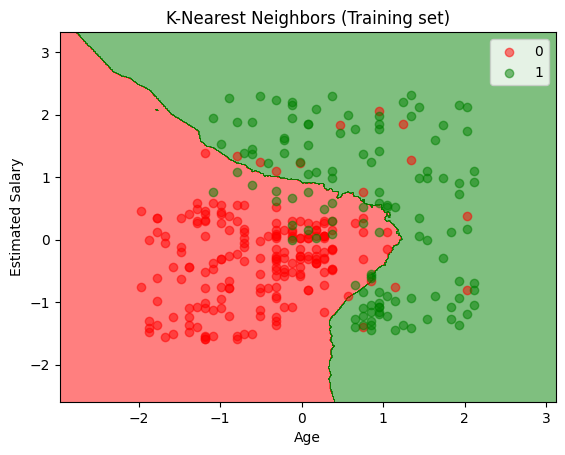

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbors (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

<ipython-input-20-e4a5cf5bd315>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.9,


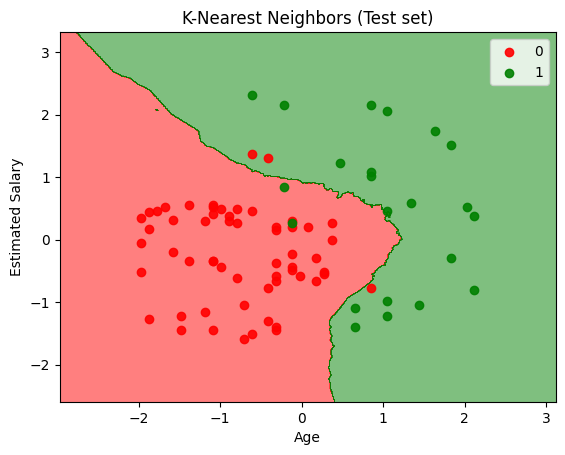

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.9,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbors (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()